In [3]:
#Install packages
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
king_df = pd.read_csv('wa_election_data/BallotStatusReport_20220218_KI.csv',encoding='windows-1252')

In [5]:
king_df.head()

,Ballot ID,Voter ID,County,First Name,Last Name,Gender,Election,Ballot Status,Challenge Reason,Sent Date,...,City,State,Zip,Country,Split,Precinct,Return Method,Return Location,Batch Sent,Batch Returned
0,106943949,3618667,King,VICKI,AABERG,F,Special Feb 8 2022,Accepted,NaN,1/19/2022 0:00,...,KENT,WA,98030,USA,3911.652,KEN 47-3911,Mail,NaN,24311.0,10955.0
1,106696683,11717681,King,ISABEL,AABERG,F,Special Feb 8 2022,Accepted,NaN,1/19/2022 0:00,...,KENT,WA,98030,USA,3911.652,KEN 47-3911,Mail,NaN,24311.0,11259.0
2,106445951,1387270,King,GLEN,AABERG,M,Special Feb 8 2022,Accepted,NaN,1/19/2022 0:00,...,KENT,WA,98030,USA,3911.652,KEN 47-3911,Mail,NaN,24311.0,10955.0
3,106955695,3020297,King,DAVID,AABY,M,Special Feb 8 2022,Accepted,NaN,1/19/2022 0:00,...,ENUMCLAW,WA,98022,USA,3247.757,ENM 31-3247,Drop Box,Enumclaw Library,24311.0,12080.0
4,106553483,3575702,King,JACQUELYN,AABY,F,Special Feb 8 2022,Accepted,NaN,1/19/2022 0:00,...,RENTON,WA,98058,USA,2459.959,FAIRHAVEN,Mail,NaN,24311.0,10233.0


Checking against https://www.sos.wa.gov/2022-february-special-election
IMPORTANT: This is only King Country of Ballot Return Data provided from Secretary of State Elections Office.


State

Voters in Election: 3,080,390
Ballots Returned: 980,819
King

Voters in Election: 1,157,819
Ballots Returned: 362,064
I have 362,064 total rows of assumed 1 voter per row

# Exploratory Data Analysis

In [8]:
king_df.describe(include = 'object')


,County,First Name,Last Name,Gender,Election,Ballot Status,Challenge Reason,Sent Date,Received Date,Address,City,State,Zip,Country,Precinct,Return Method,Return Location
count,362064,362047,362056,361819,362064,362064,5246,362064,362064,362064,361743,361359,361359,362064,362059,362064,145872
unique,1,28892,83885,4,1,2,8,35,38,226487,955,53,1012,66,2306,6,74
top,King,MICHAEL,SMITH,F,Special Feb 8 2022,Accepted,Too Late,1/19/2022 0:00,2/8/2022 0:00,77 S WASHINGTON ST,SEATTLE,WA,98115,USA,WELCOME LAKE,Mail,King County Elections
freq,362064,6055,2411,184819,362064,356818,2625,357077,94475,23,160404,360449,15546,361362,464,214890,8268


### How many ballots were returned?

In [7]:
# Total rows in our datasets
total_elligible_voters = 1157819
ballots_returned = king_df.shape[0]

print("Ballots Returned:", king_df.shape[0])
print("Percent Returned:", f"{king_df.shape[0]/total_elligible_voters:.2%}")

Ballots Returned: 362064
Percent Returned: 31.27%


In [9]:
#TODO: Add visual

### How many Ballots were accepted?

In [29]:
king_df['Ballot Status'].value_counts()

Ballot Status
Accepted    356818
Rejected      5246
Name: count, dtype: int64

In [ ]:
# Ballot status: accepted
ballot_status = king_df['Ballot Status'].value_counts()
accepted_ballots = ballot_status.loc[['Accepted']][0]

print("Total Accepted Ballots:",ballot_status.loc[['Accepted']][0] )
print("Percent Accepted of Returned Ballots:", f"{accepted_ballots/ballots_returned:.2%}")
print("\nPercent of Elligible Voters with Accepted Ballots:", f"{accepted_ballots/total_elligible_voters:.2%}" )

Total Accepted Ballots: 356818
Percent Accepted of Returned Ballots: 98.55%

Percent of Elligible Voters with Accepted Ballots: 30.82%


In [10]:
# TODO: Add visual

### How many Ballots were challenged?

In [32]:
challenged_ballots = ballot_status.loc[['Rejected']][0]

print("Ballots Challenged:",challenged_ballots)
print("Percent Challenged:", f"{challenged_ballots/ballots_returned:.2%}")

Ballots Challenged: 5246
Percent Challenged: 1.45%


### Returns by Method

In [33]:
king_df['Return Method'].value_counts()

Return Method
Mail                    214890
Drop Box                145872
Email                      778
Non-Standard Mail          256
Non-Standard Dropbox       253
Fax                         15
Name: count, dtype: int64

Return Method
Mail        214890
Drop Box    145872
Name: count, dtype: int64


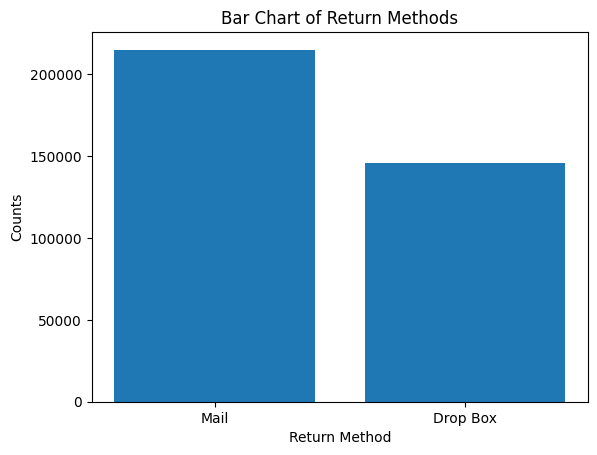

In [52]:
# create a bar chart of total counts: mail vs drop box

#total counts for each value
return_method_counts = king_df['Return Method'].value_counts()
selected_counts = return_method_counts.loc[['Mail','Drop Box']]
other_counts = return_method_counts.loc[['Email','Non-Standard Mail','Non-Standard Dropbox','Fax']]

print(selected_counts)

#Bar chart
plt.bar(selected_counts.index, selected_counts.values)
plt.xlabel('Return Method')
plt.ylabel('Counts')
plt.title('Bar Chart of Return Methods')
plt.show()

Return Method
Email                   778
Non-Standard Mail       256
Non-Standard Dropbox    253
Fax                      15
Name: count, dtype: int64


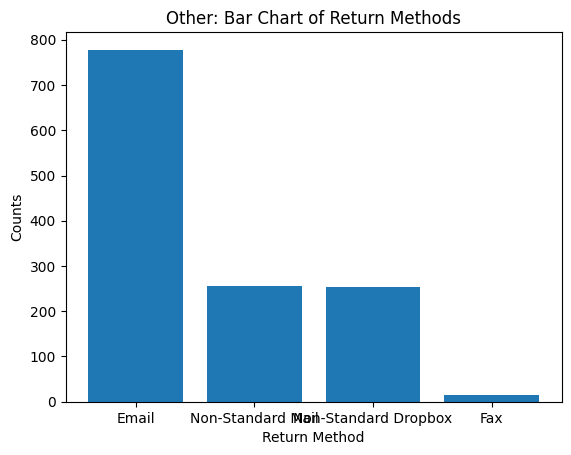

In [54]:
other_counts = return_method_counts.loc[['Email','Non-Standard Mail','Non-Standard Dropbox','Fax']]

print(other_counts)

#Bar chart
plt.bar(other_counts.index, other_counts.values)
plt.xlabel('Return Method')
plt.ylabel('Counts')
plt.title('Other: Bar Chart of Return Methods')
plt.show()

### Returns in a spceific Precinct:  SEA 37-3796

In [69]:
king_df['Precinct'].value_counts()

Precinct
WELCOME LAKE    464
ENM 31-3248     435
RED 45-3315     425
SEA 32-2215     417
SEA 43-1788     413
               ... 
SILVER SPURS      2
M-V 05-3781       2
SPRING LAKE       2
TUK 11-1167       1
FRAGER            1
Name: count, Length: 2306, dtype: int64

In [67]:
king_df['Precinct'].loc[king_df['Precinct'] == 'SEA 37-3796'].count()

131